In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(50000, 10)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [6]:
%%time

from keras import models, layers

# define
input_img = layers.Input((32,32,3))
x = layers.Conv2D(32, (3,3),  padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(124, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(124, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(268, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(10)(x)
output_y_hat = layers.Activation('softmax')(x)

model = models.Model(input_img, output_y_hat)

model.summary()

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 124)       35836     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 124)       496       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 124)       0     

In [7]:
%%time
Hist = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/100
79/79 [==============================] - 72s 439ms/step - loss: 2.0086 - accuracy: 0.3545 - val_loss: 2.8788 - val_accuracy: 0.1391
Epoch 2/100
79/79 [==============================] - 32s 409ms/step - loss: 1.3134 - accuracy: 0.5346 - val_loss: 3.2799 - val_accuracy: 0.1624
Epoch 3/100
79/79 [==============================] - 33s 414ms/step - loss: 1.0809 - accuracy: 0.6204 - val_loss: 3.0794 - val_accuracy: 0.1630
Epoch 4/100
79/79 [==============================] - 33s 420ms/step - loss: 0.9375 - accuracy: 0.6723 - val_loss: 2.5631 - val_accuracy: 0.2832
Epoch 5/100
79/79 [==============================] - 34s 426ms/step - loss: 0.8678 - accuracy: 0.6978 - val_loss: 1.7534 - val_accuracy: 0.4112
Epoch 6/100
79/79 [==============================] - 34s 427ms/step - loss: 0.8064 - accuracy: 0.7183 - val_loss: 1.3453 - val_accuracy: 0.5431
Epoch 7/100
79/79 [==============================] - 34s 432ms/step - loss: 0.7400 - accuracy: 0.7447 - val_loss: 1.3153 - val_accuracy:

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

313/313 [==============================] - 3s 10ms/step - loss: 1.6573 - accuracy: 0.7189


(1.6572608947753906, 0.7189000248908997)

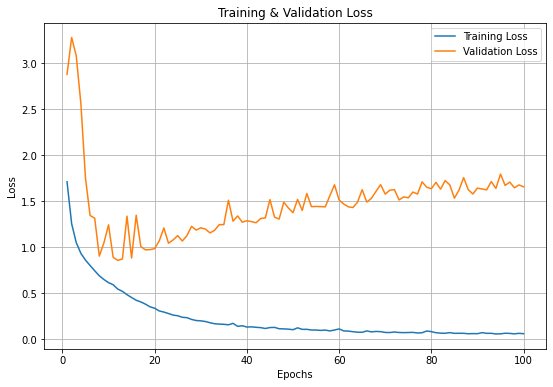

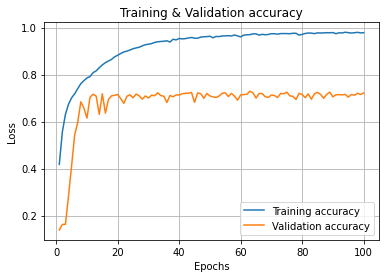

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()